In [1]:
import sys
import warnings

In [2]:
sys.path.append('C:/Users/vmysorea/mne-python/')
sys.path.append('C:/Users/vmysorea/ANLffr/')

In [3]:
import mne 
from anlffr.helper import biosemi2mne as bs
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi']  = 120

In [4]:
bs.importbdf?

In [5]:
raw, eves = bs.importbdf('C:/Users/vmysorea/OneDrive - purdue.edu/Gamma_Analysis/ABR Files/S053_ABR+001.bdf')

Extracting EDF parameters from C:\Users\vmysorea\OneDrive - purdue.edu\Gamma_Analysis\ABR Files\S053_ABR+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4358143  =      0.000 ...   266.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom EEG reference.
Trigger channel has a non-zero initial value of 65280 (consider using initial_event=True to detect this event)
4816 events found
Event IDs: [  3   5   6   9  10  12  48  80  96 144 160 192]


In [6]:
#LP Filtering

In [7]:
raw.filter (0., 90.)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 90 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 90.00 Hz
- Upper transition bandwidth: 22.50 Hz (-6 dB cutoff frequency: 101.25 Hz)
- Filter length: 2403 samples (0.147 sec)



<RawEDF | S053_ABR+001.bdf, 41 x 4358144 (266.0 s), ~1.33 GB, data loaded>

In [8]:
raw.info
%whos

Variable   Type       Data/Info
-------------------------------
bs         module     <module 'anlffr.helper.bi<...>\helper\\biosemi2mne.py'>
eves       ndarray    4816x3: 14448 elems, type `int64`, 115584 bytes (112.875 kb)
mne        module     <module 'mne' from 'C:/Us<...>ython\\mne\\__init__.py'>
plt        module     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
raw        RawEDF     <RawEDF | S053_ABR+001.bd<...>), ~1.33 GB, data loaded>
sys        module     <module 'sys' (built-in)>
warnings   module     <module 'warnings' from '<...>onda3\\lib\\warnings.py'>


In [9]:
#Remove blink artifacts

Using matplotlib backend: Qt5Agg


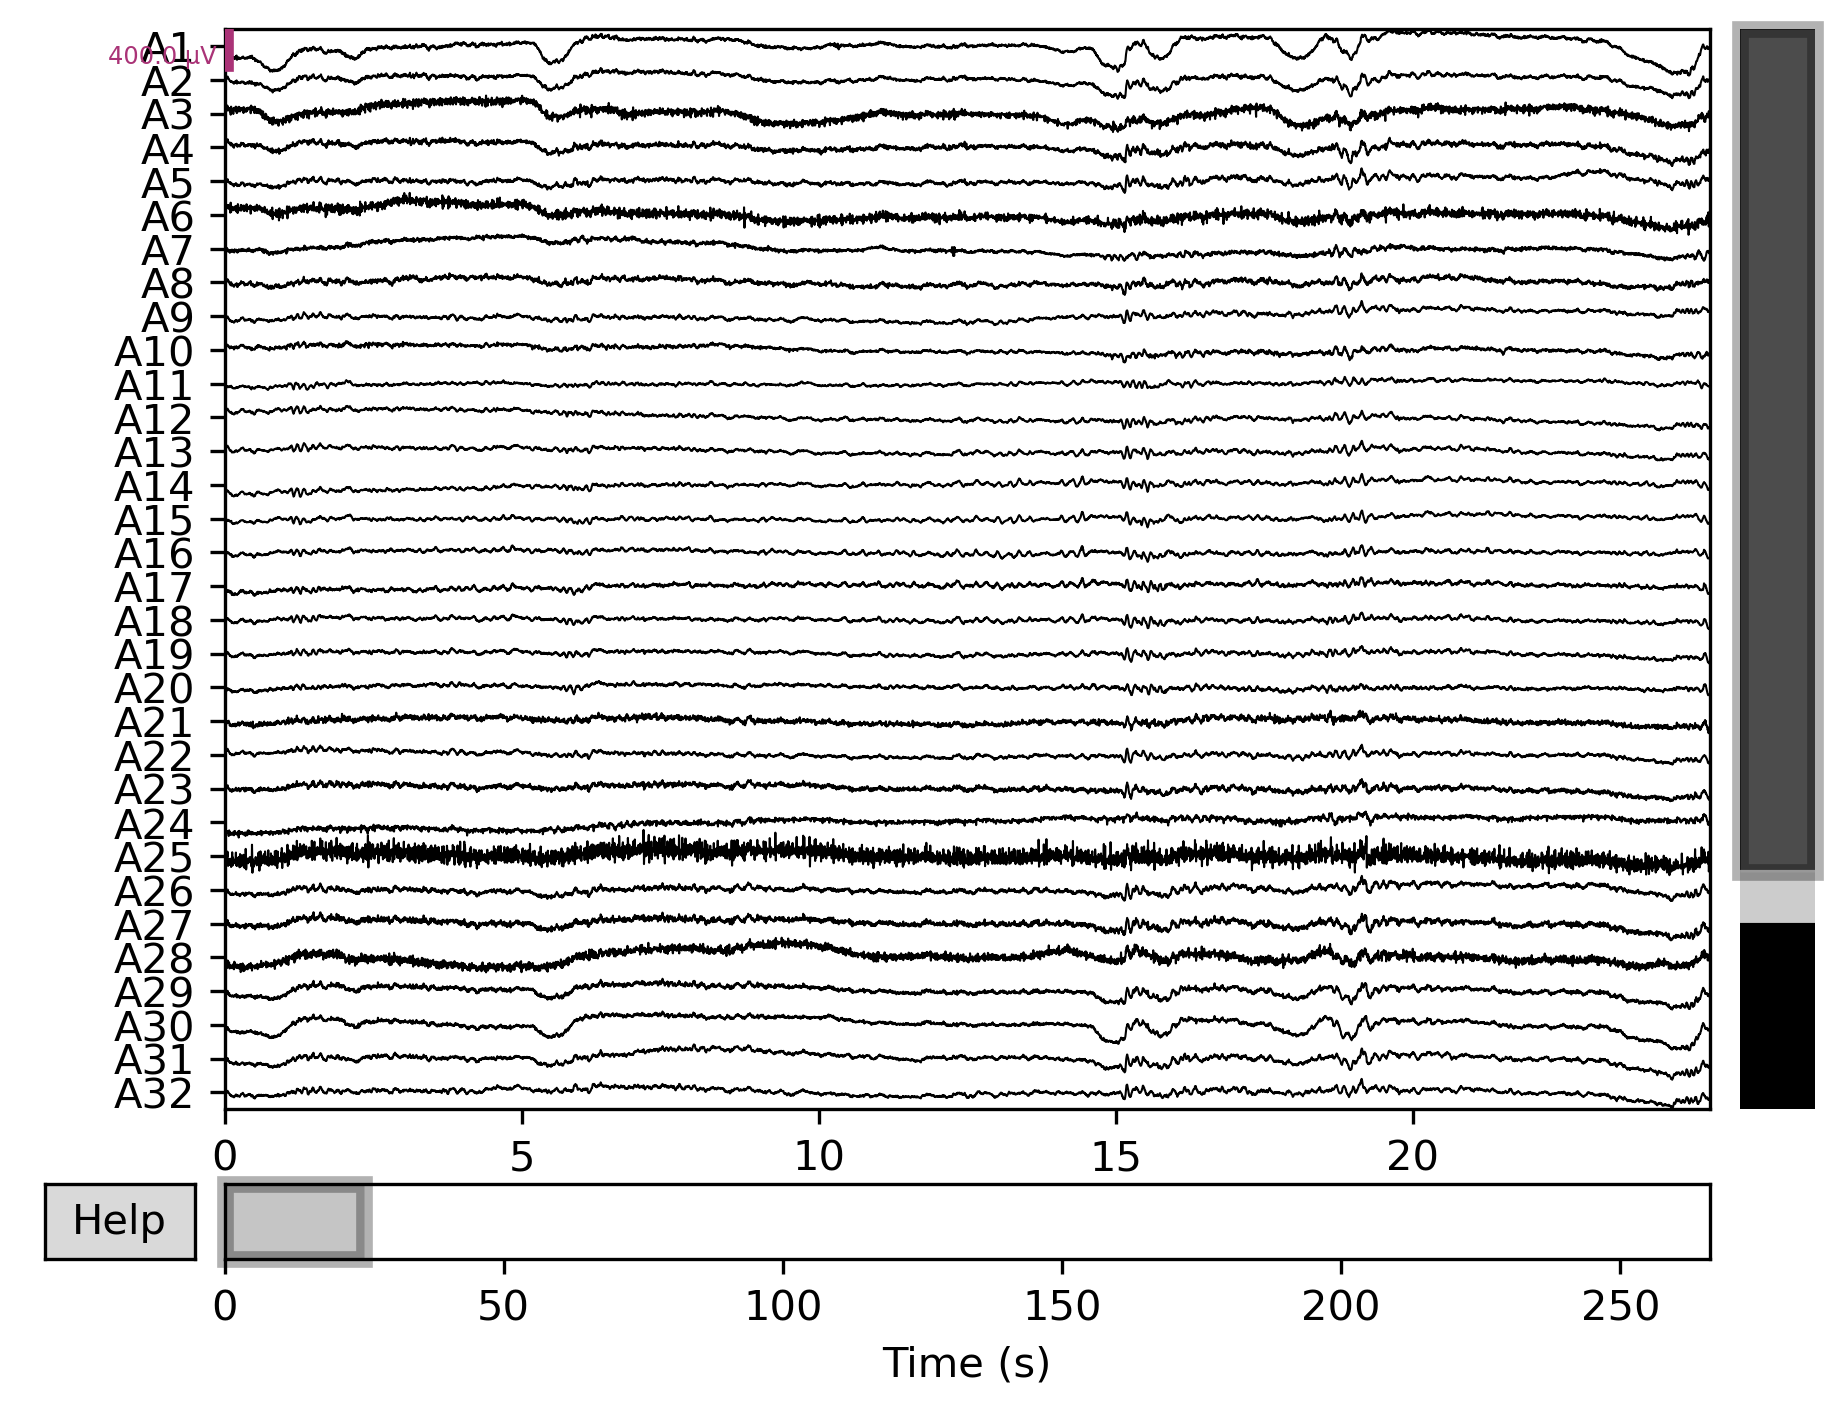

In [10]:
%matplotlib
raw.plot(duration=25.0, n_channels=32, scalings=dict(eeg=200e-6))

Setting up band-pass filter from 0.5 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.15 Hz (-6 dB cutoff frequency: 0.42 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 360449 samples (22.000 sec)



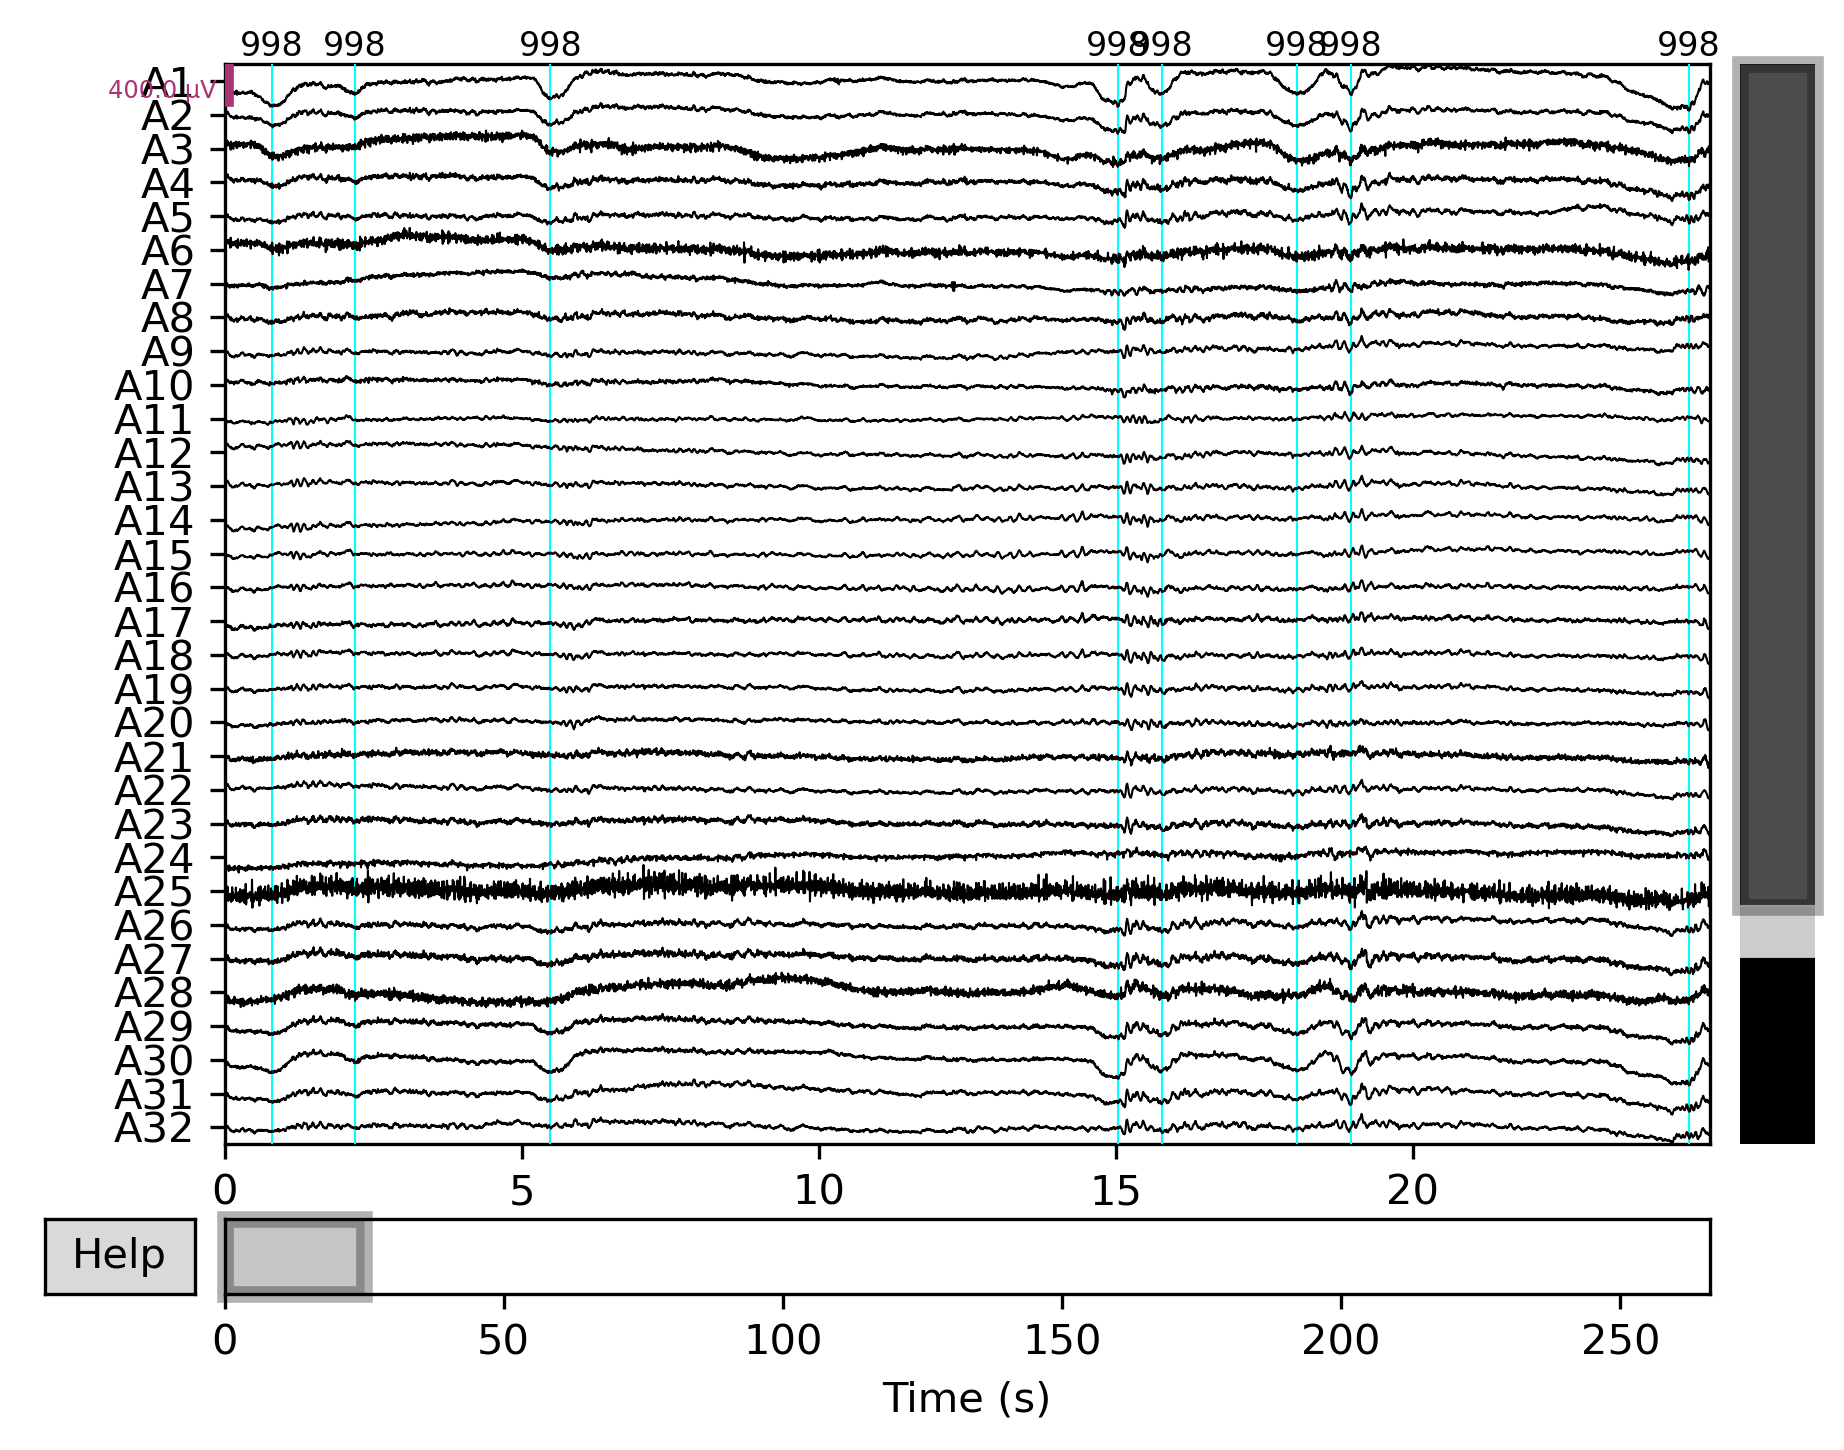

In [11]:
from anlffr.preproc import find_blinks
blinks = find_blinks(raw)
raw.plot(events=blinks, duration=25.0, n_channels=32, scalings=dict(eeg=200e-6))

In [12]:
from mne import compute_proj_epochs
epochs_blinks = mne.Epochs(raw, blinks, event_id=998, baseline=(-0.25, 0.25),
                           reject=dict(eeg=500e-6), tmin=-0.25, tmax=0.25)

Not setting metadata
Not setting metadata
116 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


In [13]:
blink_proj = compute_proj_epochs(epochs_blinks, n_eeg=2)

    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A25', 'A28']
    Rejecting  epoch based on EEG : ['A25']
    Rejecting  epoch based on EEG : ['A6', 'A25']
    Rejecting  epoch based on EEG : ['A6', 'A25']
    Rejecting  epoch based on EEG : ['A6', 'A25']
    Rejecting  epoch based on EEG : ['A4', 'A6', 'A21', 'A23', 'A25']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A6']
    Rejecting  epoch based on EEG : ['A3', 'A4', 'A6']
    Rejecting  epoch based on EEG : ['A25']
    Rejecting  epoch based on EEG : ['A25']
    Rejecting  epoch based on EEG : ['A25']
    Rejecting  epoch based on EEG : ['A25']
    Rejecting  epoch based on EEG : ['A25']
No gradiometers found. Forcing n_grad to 0
No magnetometers found. Forcing n_mag to 0
Adding projection: eeg-998--0.250-0.250-PCA-01
Adding projection: eeg-998--0.250-0.250-PCA-02


In [14]:
raw.add_proj(blink_proj)

2 projection items deactivated


<RawEDF | S053_ABR+001.bdf, 41 x 4358144 (266.0 s), ~1.33 GB, data loaded>

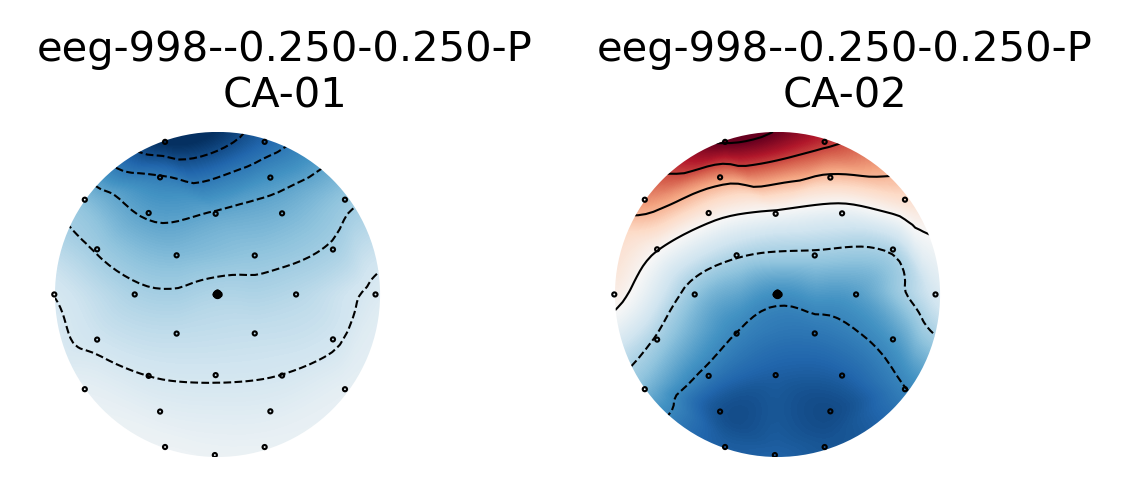

In [15]:
raw.plot_projs_topomap()       #Visualizing the spatial filter

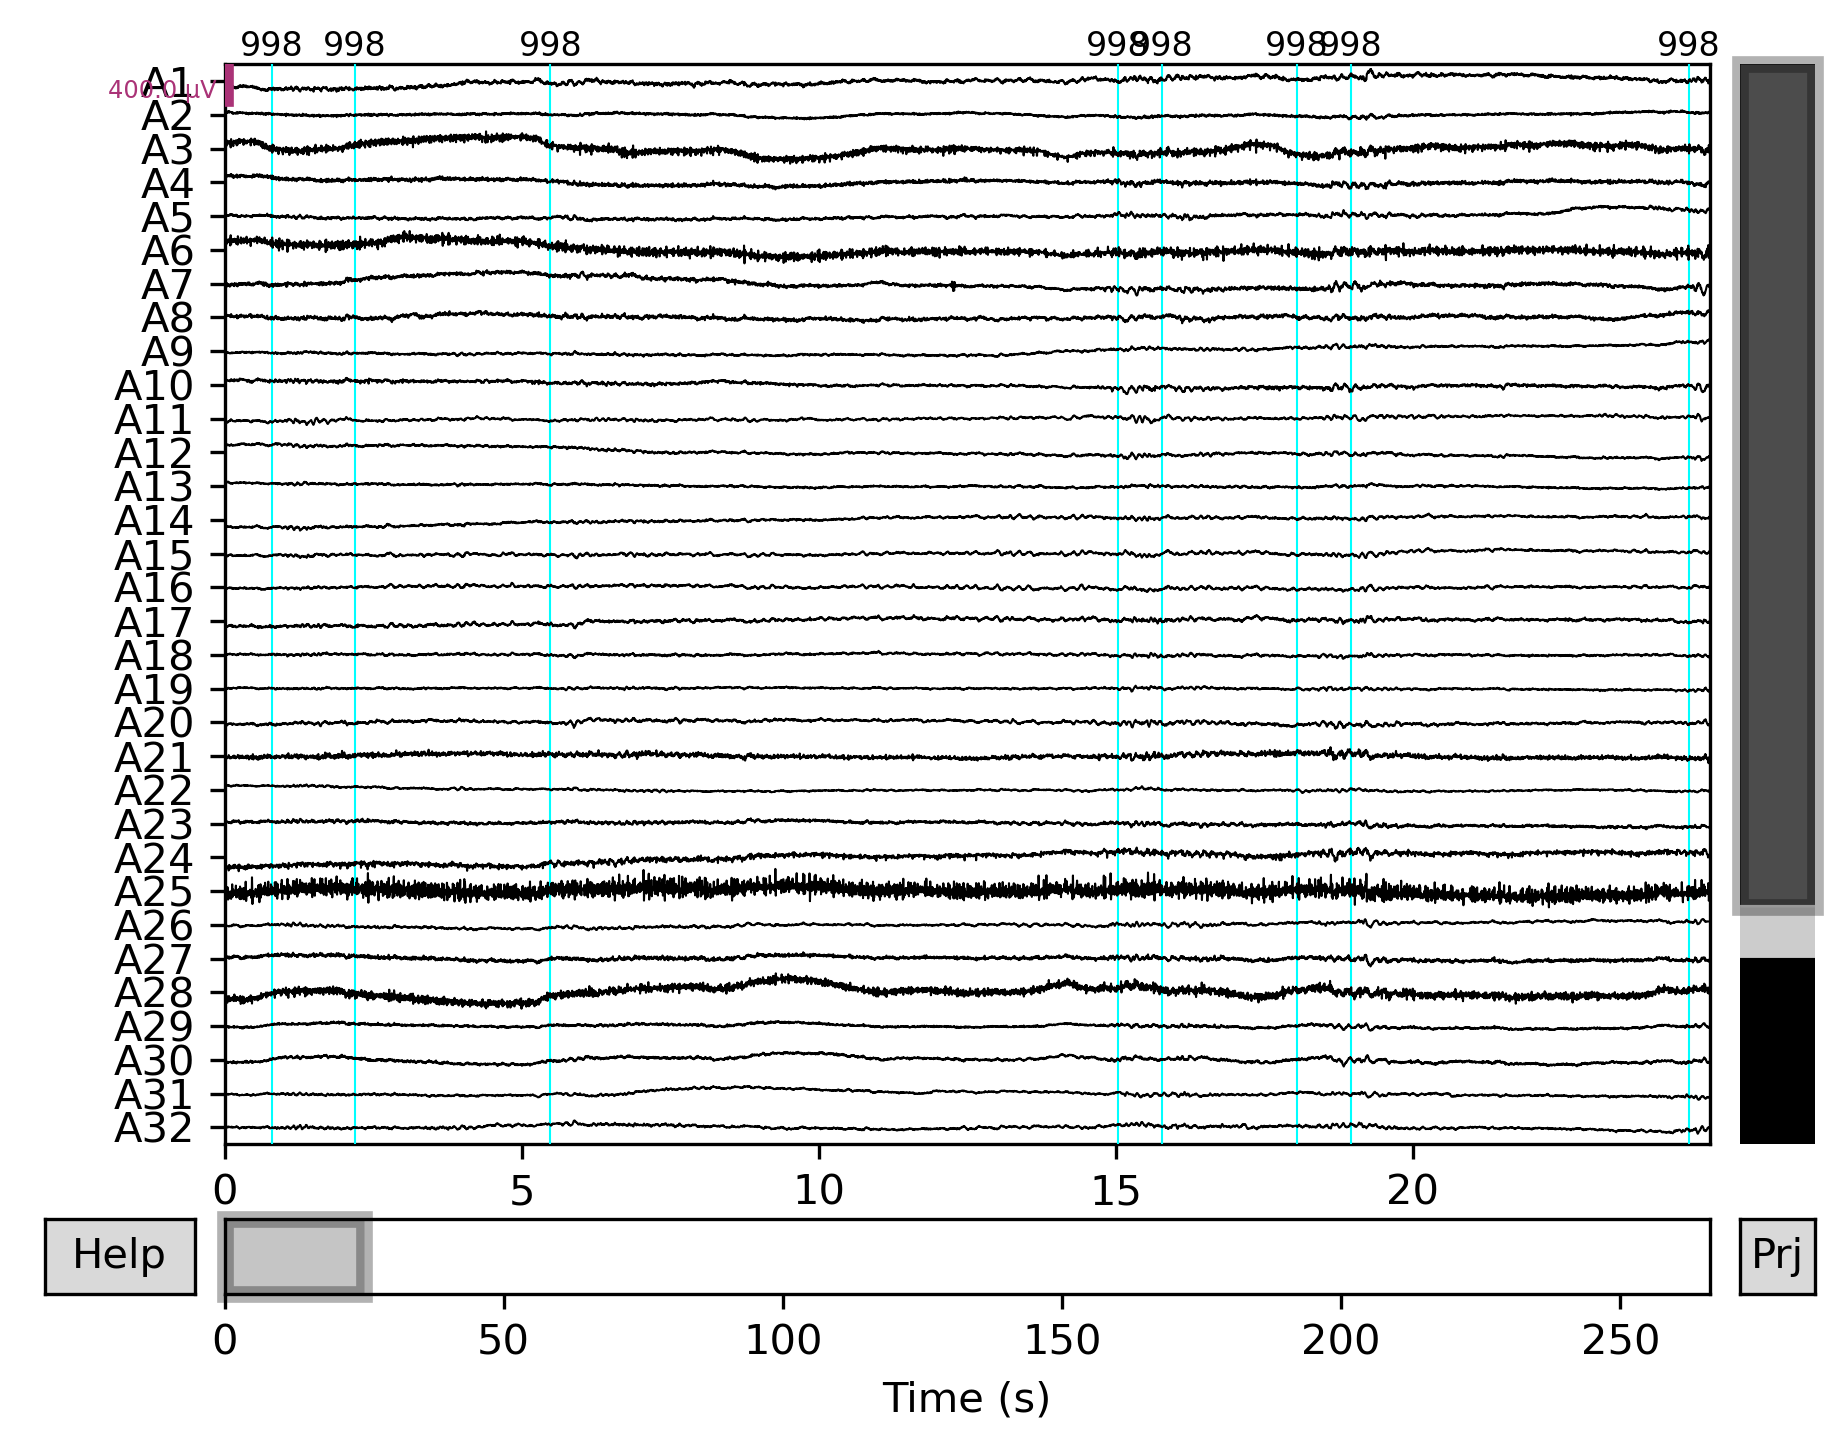

In [16]:
raw.plot(events=blinks, duration=25.0, n_channels=32, scalings=dict(eeg=200e-6),proj=True)

In [17]:
#Filtering for gamma activity analysis

In [18]:
raw.filter(30., 90.)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 90 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 90.00 Hz
- Upper transition bandwidth: 22.50 Hz (-6 dB cutoff frequency: 101.25 Hz)
- Filter length: 7209 samples (0.440 sec)



<RawEDF | S053_ABR+001.bdf, 41 x 4358144 (266.0 s), ~1.33 GB, data loaded>

In [19]:
raw.info
%whos

Variable              Type        Data/Info
-------------------------------------------
blink_proj            list        n=2
blinks                ndarray     116x3: 348 elems, type `int64`, 2784 bytes
bs                    module      <module 'anlffr.helper.bi<...>\helper\\biosemi2mne.py'>
compute_proj_epochs   function    <function compute_proj_ep<...>hs at 0x00000279DB11E5E0>
epochs_blinks         Epochs      <Epochs |  116 events (go<...>not loaded,\n '998': 116>
eves                  ndarray     4816x3: 14448 elems, type `int64`, 115584 bytes (112.875 kb)
find_blinks           function    <function find_blinks at 0x0000027A365679D0>
mne                   module      <module 'mne' from 'C:/Us<...>ython\\mne\\__init__.py'>
plt                   module      <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
raw                   RawEDF      <RawEDF | S053_ABR+001.bd<...>), ~1.33 GB, data loaded>
sys                   module      <module 'sys' (built-in)>
warnings              m

In [20]:
#Creating event list of 5 seconds

In [21]:
raw._data.shape #Gives the number of channels and the samples 

(41, 4358144)

In [22]:
raw.info ['sfreq']  #Gives the sampling frequency 

16384.0

In [23]:
4358144/16384*5 #To find the number of 5 sec events, we divide the no.of samples by sampling frequency * 5 sec (event duration required)

1330.0

In [24]:
import numpy as np

In [25]:
eves_manual = np.zeros((1330, 3)) # Creating an array with 1330 rows of 3 columns

In [26]:
eves_manual [:, 2] = 1  #Third column of trigger number as 1 (Since here, we are not looking for evoked activity)

In [27]:
eves_manual

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [28]:
for k in range (1330):
    eves_manual[k, 0] = (k + 1)*5*16384   #In every row, creating 5 second events. The first row is 5secs*SF, the second row is 10 sec*SF and so on. 

In [29]:
eves_manual

array([[8.1920000e+04, 0.0000000e+00, 1.0000000e+00],
       [1.6384000e+05, 0.0000000e+00, 1.0000000e+00],
       [2.4576000e+05, 0.0000000e+00, 1.0000000e+00],
       ...,
       [1.0878976e+08, 0.0000000e+00, 1.0000000e+00],
       [1.0887168e+08, 0.0000000e+00, 1.0000000e+00],
       [1.0895360e+08, 0.0000000e+00, 1.0000000e+00]])

In [30]:
eves_manual = np.int64(eves_manual)  #Integers of 64

In [31]:
eves_manual

array([[    81920,         0,         1],
       [   163840,         0,         1],
       [   245760,         0,         1],
       ...,
       [108789760,         0,         1],
       [108871680,         0,         1],
       [108953600,         0,         1]], dtype=int64)

In [32]:
#Epoching

In [33]:
epochs = mne.Epochs(raw, eves_manual, event_id=1, baseline=(0., 5.), proj=True,
                    tmin=0, tmax=5, reject=dict(eeg=200e-6))

Not setting metadata
Not setting metadata
1330 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 2)
2 projection items activated


In [34]:
#Averaging

In [35]:
#evoked = epochs.average() 

In [36]:
#evoked.plot()

In [37]:
#evoked.plot_topomap(0.220) #Visualizing spatial configuration of the response

In [38]:
#Gamma Activity Analysis

In [39]:
epochs_gamma = mne.Epochs(raw, eves_manual, event_id=1, baseline=(None), proj=True,
                        tmin=0, tmax=5, reject=dict(eeg=100e-6))

Not setting metadata
Not setting metadata
1330 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 2)
2 projection items activated


In [62]:
import numpy as np
freqs = np.arange(5., 90., 2.)
n_cycles = freqs * 0.4

In [63]:
from mne.time_frequency import tfr_multitaper

In [64]:
power = tfr_multitaper(epochs_gamma, freqs, n_cycles, return_itc=False)  # Compute for one channel

Loading data for 5 events and 81921 original time points ...


No baseline correction applied


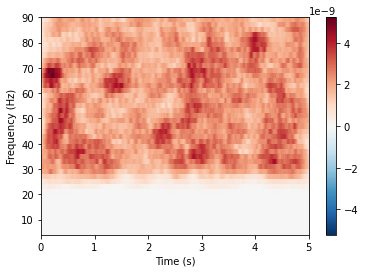

[<Figure size 432x288 with 2 Axes>]

In [65]:
power.plot(picks=[0], baseline=(None))

In [66]:
power.data

array([[[1.58373770e-11, 1.59003430e-11, 1.59616745e-11, ...,
         1.05262052e-11, 1.05141177e-11, 1.05045016e-11],
        [1.37859100e-11, 1.37287021e-11, 1.36729851e-11, ...,
         1.44642939e-11, 1.44680724e-11, 1.44726845e-11],
        [1.63141053e-11, 1.63572209e-11, 1.64002168e-11, ...,
         1.25667231e-11, 1.25335057e-11, 1.25015375e-11],
        ...,
        [6.65888475e-10, 6.66176710e-10, 6.66446769e-10, ...,
         1.53606435e-09, 1.53534319e-09, 1.53459786e-09],
        [6.27216647e-10, 6.27350710e-10, 6.27468528e-10, ...,
         1.46539838e-09, 1.46503456e-09, 1.46467596e-09],
        [4.04912024e-10, 4.04794649e-10, 4.04682049e-10, ...,
         1.17154635e-09, 1.17117415e-09, 1.17081157e-09]],

       [[4.21984179e-12, 4.20139974e-12, 4.18379129e-12, ...,
         2.89004692e-12, 2.84966637e-12, 2.80955190e-12],
        [2.94977365e-12, 2.96050937e-12, 2.97210316e-12, ...,
         4.90042902e-12, 4.85956989e-12, 4.81831115e-12],
        [3.77365591e-12, 

In [67]:
x=power.data

In [68]:
x.shape

(32, 43, 81921)

In [69]:
power_spectrum=x.mean(axis=2)

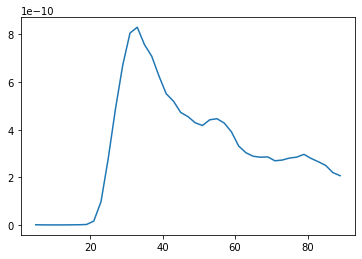

In [71]:
pl.plot(freqs,power_spectrum[30,:])

In [50]:
import pylab as pl

In [58]:
%matplotlib inline

In [60]:
pl.show()